# Lab assignment: classifying digits with Deep Networks

<img src="img/mnist.jpeg" style="width:480px;">

In this assignment we will face the problem of recognizing handwritten digits. We will see how in order to achieve maximum effectiveness we will need to resort to several Deep Learning techniques.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">You will need to solve a question by writing your own code or answer in the cell immediately below, or in a different file as instructed.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">This is a hint or useful observation that can help you solve this assignment. You are not expected to write any solution, but you should pay attention to them to understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>

During the assigment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

You will need the following packages for this particular assignment. Make sure they are available before proceeding:

* **numpy**
* **keras>=2.0**
* **matplotlib**

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## The Keras library

In this lab we will make use of the <a href=http://keras.io/>keras</a> Deep Learning library for Python. This library allows building several kinds of shallow and deep networks, following either a sequential or a graph architecture.

## Data loading

The handwritten digits recognition problem we will face is already included as a testbed in keras. Loading it only requires invoking

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


The loaded **X** variables are made up of the handwritten digits to classify, while the **y** variables contain the labels of the corresponding X images, telling the digits such images represent. We will use the **train** data to build our neural network, while we will use the **test** data to measure the performance of such network on an independent dataset.

We can check how many images we have for training and testing as follows:

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

Also we can take a look at the shape, width and height in pixels, of an image:

In [5]:
X_test[0].shape

(28, 28)

We can also visualize the images we are working with by means of using the matplotlib library. Here we are taking the first training image and painting it with a grayscale colormap. Also we are printing the corresponding class value, to ensure the labeling of the digit is correct.

Digit class: 5


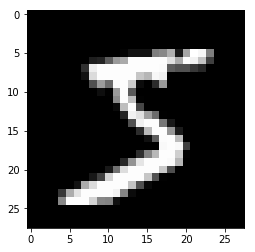

In [6]:
plt.imshow(X_train[0], 'gray')
print("Digit class:", y_train[0])

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Use the cell below to plot some other image in the training dataset, along with its corresponding digit class number. Can you find any hard to identify digit?
 </td></tr>
</table>

Digit class: 3


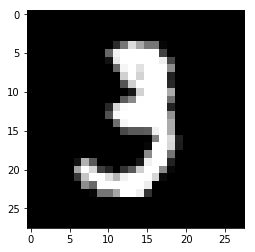

In [7]:
####### INSERT YOUR CODE HERE
plt.imshow(X_train[10], 'gray')
print("Digit class:", y_train[10])

Before starting building networks we should always normalize our data. This usually means substracting the mean from each variable and then dividing by the standard deviation. However in grayscale images like the ones we are working with all variables represent pixel intensities, and are bound to integers in the range [0, 255]. We can thus perform a simple initialization by just compressing this range to [0, 1]. We should also transform the data to real numbers (float) while performing this operation:

In [8]:
X_train = X_train.astype('float32') / 255

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Perform the same normalization for the test data
 </td></tr>
</table>

In [9]:
####### INSERT YOUR CODE HERE
X_test = X_test.astype('float32') / 255

As for the outputs, normalization as such is not required, but we should change the class encoding to something more akin to neural networks. Instead of having a single integer ranging [0,9] to encode the different classes, we will use a <a href=https://en.wikipedia.org/wiki/One-hot>one-hot vector encoding</a>

In [10]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10) # We have 10 classes to codify

Let's check that the transformation was correct:

In [11]:
Y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Repeat the same encoding for the classes of the test data
 </td></tr>
</table>

In [12]:
####### INSERT YOUR CODE HERE
Y_test = np_utils.to_categorical(y_test, 10)

## Perceptron network

Let's start trying to solve the problem with the simplest neural network: a Perceptron. This means a neural network with no hidden layers, just some weights going from input to output.

### Defining the network

Building a network in Keras begins by choosing the type of architecture. We can either decide to build a **Sequential** network, where each layer is followed by another one in a chain, or a **Graph** network, where divergences and loops of layers can take place. In this practice we will restrict ourselves to the Sequential architecture. We can initialize a Sequential network with

In [13]:
from keras.models import Sequential
model = Sequential()

Once the network has been initialized this way, we just need to iteratively add the desired layers. For the perceptron network we only require a "classic" layer of weights from input to output. Such layer is name **Dense** in Keras.

In [14]:
from keras.layers.core import Dense

Usually creating a dense layer only involves specifying the number of outputs units of such layer. But since this will be the first layer in the network we also need to specify the number of inputs. Our inputs are images of 28x28 pixels, which makes 784 input values. As for the outputs, we have 10 classes in our problem, so that makes 10 output units.

In [15]:
denselayer = Dense(10, input_shape=(784,))

Now we add the layer to network

In [16]:
model.add(denselayer)

With this we have declared the layer of weights from inputs to outputs. Since we are facing a classification problem we should also add an activation function to the output units that enforces the output values to the range [0,1]. We will choose a softmax activation for doing so:

In [17]:
from keras.layers.core import Activation
model.add(Activation('softmax'))

With this the definition of our network is completed. We can get a text description of the network by calling

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Compiling the network

After defining the network architecture the next step involves compiling the network. Compilation is an automatic process that transforms the network definition into an equivalent symbolic formulation for which derivatives can be computed, thus allowing learning through backpropagation. The only input required in this process is choosing the loss function the network should minimize, and the optimizer used for learning.

For our current network we will use **categorical crossentropy** as the loss function, as it is suitable for multiclass classification problems. As for the optimizer, we will use **Stochastic Gradient Descent**. We will also include the **classification accuracy** as a metric to measure the performance of our model.

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training the network

We are now almost ready to adjust the network parameters through training over our data. There is only one small detail left: our data is in the form of bidimensional images, while a perceptron only understands training patterns as one-dimensional vectors of data. We should then transform the data to vector form to input it into the network, something we can do with the **reshape** method of the data:

In [20]:
trainvectors = X_train.reshape(60000, 784)

We can check now that our training data has become a matrix of 60000 training patterns (rows) and 784 variables (pixels) per pattern:

In [21]:
trainvectors.shape

(60000, 784)

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Perform a similar transformation for the X_test data, saving the reshaped data into a variable named *testvectors*. Note that the number of pattens in the test data is different from the number of patterns in the training data.
 </td></tr>
</table>

In [22]:
####### INSERT YOUR CODE HERE
testvectors = X_test.reshape(10000, 784)

Now we can invoke the **fit** method of the network, which will perform the training process. It is done as follows

In [23]:
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
2s - loss: 1.2604 - acc: 0.7161
Epoch 2/20
0s - loss: 0.7090 - acc: 0.8436
Epoch 3/20
0s - loss: 0.5829 - acc: 0.8614
Epoch 4/20
0s - loss: 0.5226 - acc: 0.8701
Epoch 5/20
0s - loss: 0.4858 - acc: 0.8767
Epoch 6/20
0s - loss: 0.4604 - acc: 0.8804
Epoch 7/20
0s - loss: 0.4416 - acc: 0.8842
Epoch 8/20
0s - loss: 0.4270 - acc: 0.8869
Epoch 9/20
0s - loss: 0.4151 - acc: 0.8894
Epoch 10/20
0s - loss: 0.4053 - acc: 0.8912
Epoch 11/20
0s - loss: 0.3969 - acc: 0.8925
Epoch 12/20
0s - loss: 0.3898 - acc: 0.8941
Epoch 13/20
0s - loss: 0.3834 - acc: 0.8954
Epoch 14/20
0s - loss: 0.3779 - acc: 0.8962
Epoch 15/20
0s - loss: 0.3729 - acc: 0.8975
Epoch 16/20
0s - loss: 0.3684 - acc: 0.8984
Epoch 17/20
0s - loss: 0.3643 - acc: 0.8996
Epoch 18/20
0s - loss: 0.3607 - acc: 0.9003
Epoch 19/20
0s - loss: 0.3573 - acc: 0.9010
Epoch 20/20
0s - loss: 0.3541 - acc: 0.9016


Now that our neural network model is trained, we can obtain class predictions for the test set as follows:

In [24]:
preds = model.predict_classes(testvectors)

 9792/10000 [============================>.] - ETA: 0s

A progress bar should have appeared, showing how data from the test set is processed through the network. Note that sometimes the progress bar will not reach the total number of data patterns, but nevertheless predictions should have been made for all test patterns.

Now that we have the predictions, if we take for instance the first test pattern, its image and predicted class are

Real class 7 predicted class 7


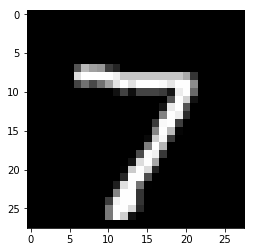

In [25]:
plt.imshow(X_test[0], 'gray')
print("Real class", y_test[0], "predicted class", preds[0])

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Compare the predicted and real classes for other images in the test set. Can you find any error?
 </td></tr>
</table>

Real class 5 predicted class 6


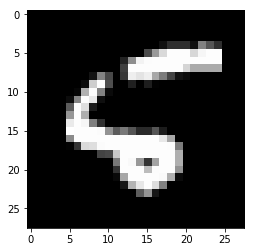

In [26]:
####### INSERT YOUR CODE HERE
import numpy as np
(fails,) = np.where(y_test != preds)
plt.imshow(X_test[fails[0]], 'gray')
print("Real class", y_test[fails[0]], "predicted class", preds[fails[0]])

<table>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">
You can spot all the errors in an automated way by comparing *y_test* against *preds* and getting the indexes of the mismatching elements. The function <a href=http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.where.html>np.where</a> might also help.
 </td></tr>
</table>

An overall accuracy measure can also be obtained by means of the **evaluate** method of the model

In [27]:
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

 8832/10000 [=========================>....] - ETA: 0sTest loss 0.33519603169
Test accuracy 0.9079


<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Do you think the level of accuracy obtained is good enough for a real application? Suppose that every time a single digit is misclasified a package might be sent to the wrong address, and ZIP codes in the USA are made of 9 digits. What is the probability of sending a package to a wrong address?
 </td></tr>
</table>

In [28]:
####### INSERT YOUR CODE HERE
1-score[1]**9

0.58087637189618191

## Multilayer Perceptron

A potential way to attain further improvements might be to create a deeper network, by adding layers of hidden units. This is easy to do in Keras, just by defining a new architecture with several Dense layers. For example, to build a network with a hidden layer of 10 units with sigmoid activation we would write:

In [29]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

So we have the model

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Compile the defined network and train it with the data. Then measure the accuracy over the test data. Have you managed to get any improvement over the previous Perceptron model?
 </td></tr>
</table>

In [31]:
####### INSERT YOUR CODE HERE
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
1s - loss: 2.2018 - acc: 0.2585
Epoch 2/20
0s - loss: 1.9687 - acc: 0.5510
Epoch 3/20
0s - loss: 1.7801 - acc: 0.6744
Epoch 4/20
0s - loss: 1.6110 - acc: 0.7417
Epoch 5/20
1s - loss: 1.4589 - acc: 0.7807
Epoch 6/20
0s - loss: 1.3240 - acc: 0.8052
Epoch 7/20
0s - loss: 1.2062 - acc: 0.8182
Epoch 8/20
0s - loss: 1.1047 - acc: 0.8276
Epoch 9/20
0s - loss: 1.0183 - acc: 0.8354
Epoch 10/20
0s - loss: 0.9449 - acc: 0.8417
Epoch 11/20
0s - loss: 0.8828 - acc: 0.8465
Epoch 12/20
0s - loss: 0.8298 - acc: 0.8510
Epoch 13/20
0s - loss: 0.7845 - acc: 0.8550
Epoch 14/20
0s - loss: 0.7454 - acc: 0.8591
Epoch 15/20
0s - loss: 0.7115 - acc: 0.8619
Epoch 16/20
0s - loss: 0.6818 - acc: 0.8647
Epoch 17/20
0s - loss: 0.6555 - acc: 0.8673
Epoch 18/20
0s - loss: 0.6323 - acc: 0.8694
Epoch 19/20
1s - loss: 0.6116 - acc: 0.8711
Epoch 20/20
0s - loss: 0.5929 - acc: 0.8731
 9248/10000 [==========================>...] - ETA: 0s

### Fine tuning the network design

To improve the performance of the multilayer perceptron we will use the following:
* Increase the number of hidden units
* Use a better activation function: rectified linear
* Use a better optimizer: adam

This boils down to defining the network as

In [32]:
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. Did these changes give rise to better results?
 </td></tr>
</table>

In [33]:
####### INSERT YOUR CODE HERE
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
1s - loss: 0.3756 - acc: 0.8983
Epoch 2/20
1s - loss: 0.1690 - acc: 0.9518
Epoch 3/20
1s - loss: 0.1253 - acc: 0.9639
Epoch 4/20
1s - loss: 0.0994 - acc: 0.9714
Epoch 5/20
1s - loss: 0.0825 - acc: 0.9760
Epoch 6/20
1s - loss: 0.0695 - acc: 0.9799
Epoch 7/20
1s - loss: 0.0597 - acc: 0.9829
Epoch 8/20
1s - loss: 0.0506 - acc: 0.9853
Epoch 9/20
1s - loss: 0.0435 - acc: 0.9877
Epoch 10/20
1s - loss: 0.0389 - acc: 0.9887
Epoch 11/20
1s - loss: 0.0330 - acc: 0.9909
Epoch 12/20
1s - loss: 0.0287 - acc: 0.9924
Epoch 13/20
1s - loss: 0.0255 - acc: 0.9932
Epoch 14/20
1s - loss: 0.0231 - acc: 0.9936
Epoch 15/20
1s - loss: 0.0197 - acc: 0.9951
Epoch 16/20
1s - loss: 0.0173 - acc: 0.9960
Epoch 17/20
1s - loss: 0.0148 - acc: 0.9967
Epoch 18/20
1s - loss: 0.0128 - acc: 0.9975
Epoch 19/20
1s - loss: 0.0113 - acc: 0.9977
Epoch 20/20
1s - loss: 0.0102 - acc: 0.9980
 9568/10000 [===========================>..] - ETA: 0s

### More layers

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Define a new network with two hidden layers, each of 512 hidden units with rectified linear activation. For the output use the softmax activation. Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. How are you doing now?
 </td></tr>
</table>

In [34]:
####### INSERT YOUR CODE HERE
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
2s - loss: 0.2204 - acc: 0.9349
Epoch 2/20
1s - loss: 0.0784 - acc: 0.9750
Epoch 3/20
1s - loss: 0.0512 - acc: 0.9838
Epoch 4/20
1s - loss: 0.0363 - acc: 0.9878
Epoch 5/20
1s - loss: 0.0287 - acc: 0.9906
Epoch 6/20
1s - loss: 0.0204 - acc: 0.9931
Epoch 7/20
1s - loss: 0.0164 - acc: 0.9945
Epoch 8/20
1s - loss: 0.0168 - acc: 0.9946
Epoch 9/20
1s - loss: 0.0162 - acc: 0.9947
Epoch 10/20
1s - loss: 0.0139 - acc: 0.9956
Epoch 11/20
1s - loss: 0.0113 - acc: 0.9965
Epoch 12/20
1s - loss: 0.0114 - acc: 0.9962
Epoch 13/20
1s - loss: 0.0110 - acc: 0.9966
Epoch 14/20
1s - loss: 0.0067 - acc: 0.9978
Epoch 15/20
1s - loss: 0.0104 - acc: 0.9967
Epoch 16/20
1s - loss: 0.0113 - acc: 0.9963
Epoch 17/20
1s - loss: 0.0069 - acc: 0.9975
Epoch 18/20
1s - loss: 0.0072 - acc: 0.9980
Epoch 19/20
1s - loss: 0.0096 - acc: 0.9971
Epoch 20/20
1s - loss: 0.0051 - acc: 0.9986
 9088/10000 [==========================>...] - ETA: 0s

### Introducing regularization

Regularization can help improve the performance of a network, specially when the number of network parameters becomes large and this leads to better performance in training data than in test data, which is to say, overfitting. One of the most simple and effective ways of doing so is by using **dropout**. In Keras dropout is imposed on the network by adding a **Dropout** layer. Such Dropout layer takes the outputs from the previous layer and randomly assigns $0$ values to some of them, so that the next layer only sees part of the outputs generated.

For instance, to create a network with a hidden layer with a dropout of a 30% probability of dropping an output we would write

In [35]:
from keras.layers.core import Dropout
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Define a new network with two hidden layers, each of 512 hidden units with rectified linear activation. After both hidden layers you should add a Dropout of 40%. For the output use the softmax activation. Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. Has dropout helped?
 </td></tr>
</table>

In [36]:
####### INSERT YOUR CODE HERE
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
2s - loss: 0.3061 - acc: 0.9067
Epoch 2/20
1s - loss: 0.1354 - acc: 0.9587
Epoch 3/20
1s - loss: 0.1048 - acc: 0.9672
Epoch 4/20
1s - loss: 0.0859 - acc: 0.9723
Epoch 5/20
1s - loss: 0.0736 - acc: 0.9769
Epoch 6/20
1s - loss: 0.0690 - acc: 0.9781
Epoch 7/20
1s - loss: 0.0621 - acc: 0.9804
Epoch 8/20
1s - loss: 0.0537 - acc: 0.9826
Epoch 9/20
1s - loss: 0.0505 - acc: 0.9831
Epoch 10/20
1s - loss: 0.0476 - acc: 0.9853
Epoch 11/20
1s - loss: 0.0459 - acc: 0.9852
Epoch 12/20
1s - loss: 0.0424 - acc: 0.9864
Epoch 13/20
1s - loss: 0.0383 - acc: 0.9870
Epoch 14/20
1s - loss: 0.0387 - acc: 0.9876
Epoch 15/20
1s - loss: 0.0373 - acc: 0.9877
Epoch 16/20
1s - loss: 0.0354 - acc: 0.9883
Epoch 17/20
1s - loss: 0.0312 - acc: 0.9898
Epoch 18/20
1s - loss: 0.0324 - acc: 0.9900
Epoch 19/20
1s - loss: 0.0336 - acc: 0.9885
Epoch 20/20
1s - loss: 0.0288 - acc: 0.9907
 9120/10000 [==========================>...] - ETA: 0s 

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Try training a network with more hidden layers. Does the performance improve in any way by doing this?
 </td></tr>
</table>

In [37]:
####### INSERT YOUR CODE HERE
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
2s - loss: 0.3427 - acc: 0.8932
Epoch 2/20
2s - loss: 0.1531 - acc: 0.9543
Epoch 3/20
2s - loss: 0.1174 - acc: 0.9641
Epoch 4/20
2s - loss: 0.1007 - acc: 0.9693
Epoch 5/20
2s - loss: 0.0889 - acc: 0.9733
Epoch 6/20
2s - loss: 0.0816 - acc: 0.9750
Epoch 7/20
2s - loss: 0.0713 - acc: 0.9779
Epoch 8/20
2s - loss: 0.0661 - acc: 0.9798
Epoch 9/20
2s - loss: 0.0623 - acc: 0.9812
Epoch 10/20
2s - loss: 0.0604 - acc: 0.9814
Epoch 11/20
2s - loss: 0.0557 - acc: 0.9834
Epoch 12/20
2s - loss: 0.0532 - acc: 0.9839
Epoch 13/20
2s - loss: 0.0509 - acc: 0.9846
Epoch 14/20
2s - loss: 0.0490 - acc: 0.9853
Epoch 15/20
2s - loss: 0.0474 - acc: 0.9853
Epoch 16/20
2s - loss: 0.0464 - acc: 0.9859
Epoch 17/20
2s - loss: 0.0424 - acc: 0.9874
Epoch 18/20
2s - loss: 0.0456 - acc: 0.9858
Epoch 19/20
2s - loss: 0.0414 - acc: 0.9877
Epoch 20/20
2s - loss: 0.0383 - acc: 0.9879
 9216/10000 [==========================>...] - ETA: 0s 

## Convolutional Neural Networks

To further improve on this image recognition problem we need network layers that do consider the data as images, and take into account closeness of pixels to make decisions instead of just throwing all pixel data into a fully connected network and expect intelligence to emerge from chaos. **Convolutional** and **Pooling** layers are the best way to do so.

### Formatting the data as tensors

While for the perceptrons above we vectorized the data to fit into the perceptron framework, for convolutional networks we will need to shape the data in the form of a **4-dimensional tensor**. The dimensions of such tensor represent the following:
* Image index (e.g. 3th image in the dataset)
* Row index
* Column index
* Channel index (e.g. colour channel in colored images)

We again make use of the reshape function to perform this transformation. We have 60000 images in our training set, and those images have 28 rows x 28 columns. Since these images are grayscale, the channel dimension only contains one channel:

In [38]:
traintensor = X_train.reshape(60000, 28, 28, 1)

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Repeat the transformation for the test data. Save the resulting tensor in a variable named *testtensor*.
 </td></tr>
</table>

In [39]:
####### INSERT YOUR CODE HERE
testtensor = X_test.reshape(10000, 28, 28, 1)

### Convolution and pooling layers

When defining a convolutional network, Convolution and Pooling layers work together. The most popular way of using these layers is in the following pattern:
* A Convolution layer with rectified linear activations
* A Pooling layer
* Dropout (if regularization wants to be enforced)

We can thus define a minimal convolutional network as

In [40]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D

img_rows = 28
img_cols = 28
kernel_size = 3 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers

model = Sequential()

model.add(Convolution2D(32, # Number convolution channels to generate
                        (kernel_size, kernel_size), # Size of convolution kernels
                        padding='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))

There is an issue, though: at some point we need to transform the tensor data into a vector, as the output of the network should be a vector of 10 values, representing class probabilities. We can do this by using a **Flatten** layer. Then we can add a standard Dense layer to produce the outputs:

In [41]:
from keras.layers.core import Flatten
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Use the tensor data you prepared above, not the vectorized data. Then measure the accuracy over the test data. Have the Convolution and MaxPooling helped?
 </td></tr>
</table>

In [42]:
####### INSERT YOUR CODE HERE
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
4s - loss: 0.3508 - acc: 0.9058
Epoch 2/20
3s - loss: 0.1305 - acc: 0.9626
Epoch 3/20
3s - loss: 0.0972 - acc: 0.9714
Epoch 4/20
3s - loss: 0.0832 - acc: 0.9753
Epoch 5/20
3s - loss: 0.0746 - acc: 0.9779
Epoch 6/20
3s - loss: 0.0681 - acc: 0.9796
Epoch 7/20
3s - loss: 0.0629 - acc: 0.9807
Epoch 8/20
3s - loss: 0.0585 - acc: 0.9823
Epoch 9/20
3s - loss: 0.0557 - acc: 0.9827
Epoch 10/20
3s - loss: 0.0520 - acc: 0.9837
Epoch 11/20
3s - loss: 0.0491 - acc: 0.9849
Epoch 12/20
3s - loss: 0.0475 - acc: 0.9853
Epoch 13/20
3s - loss: 0.0439 - acc: 0.9863
Epoch 14/20
3s - loss: 0.0430 - acc: 0.9872
Epoch 15/20
3s - loss: 0.0398 - acc: 0.9876
Epoch 16/20
3s - loss: 0.0375 - acc: 0.9880
Epoch 17/20
3s - loss: 0.0372 - acc: 0.9881
Epoch 18/20
3s - loss: 0.0364 - acc: 0.9882
Epoch 19/20
3s - loss: 0.0348 - acc: 0.9888
Epoch 20/20
3s - loss: 0.0322 - acc: 0.9899
 9632/10000 [===========================>..] - ETA: 0s 

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Build and train a convolutional network with the following layers:
<ul>
     <li>A Convolution layer of 32 channels, kernel size 3 and rectified linear activation</li>
     <li>Another Convolution layer of 32 channels, kernel size 3 and rectified linear activation</li>
     <li>A MaxPooling layer of size 2</li>
     <li>A 25% Dropout</li>
     <li>A Flatten layer</li>
     <li>A Dense layer with 128 units and rectified linear activation</li>
     <li>A 50% Dropout</li>
     <li>An output Dense layer with softmax activation</li>
</ul>
Has the added complexity improved the accuracy results?    
 </td></tr>
</table>

In [43]:
####### INSERT YOUR CODE HERE
img_rows = 28
img_cols = 28
kernel_size = 3 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers

model = Sequential()

model.add(Convolution2D(32, # Number convolution channels to generate
                        (kernel_size, kernel_size),
                        padding='valid',
                        input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (kernel_size, kernel_size)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=1 # Level of verbosity of the log messages
)
score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
60000/60000 [==============================] - 7s - loss: 0.2809 - acc: 0.9146       

## Final exercise: LeNet

<a href=http://yann.lecun.com/exdb/lenet/>LeNet</a> is a particular convolutional neural network definition that has proven to be quite effective. As a final exercise we will build this network and try it on our digits problem.

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Build and train a LeNet network, which is defined by the following layers:
<ul>
     <li>A Convolution layer of 20 channels, kernel size 5 and rectified linear activation</li>
     <li>A MaxPooling layer of size 2 and stride 2 (check <a href=http://keras.io/layers/convolutional/>the docs</a>)</li>
     <li>A 25% Dropout</li>
     <li>A Convolution layer of 50 channels, kernel size 5 and rectified linear activation</li>
     <li>A MaxPooling layer of size 2 and stride 2 (check <a href=http://keras.io/layers/convolutional/>the docs</a>)</li>
     <li>A 25% Dropout</li>
     <li>A Flatten layer</li>
     <li>A Dense layer with 500 units and rectified linear activation</li>
     <li>A 50% Dropout</li>
     <li>An output Dense layer with softmax activation</li>
</ul>
Is this the best network so far for the problem?
 </td></tr>
</table>

In [44]:
####### INSERT YOUR CODE HERE
img_rows = 28
img_cols = 28

model = Sequential()

model.add(Convolution2D(20, (5, 5),
                        padding='valid',
                        input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(50, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=1 # Level of verbosity of the log messages
)
score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
60000/60000 [==============================] - 5s - loss: 0.2771 - acc: 0.9107       

<center>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
                          THIS IS THE END OF THE ASSIGNMENT<br>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
</center>

## Bonus rounds

<table>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">
Rebuild the LeNet network with a larger number of training epochs. What is the best test error you can achieve?
 </td></tr>
</table>

<table>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">
If your PC has a CUDA-compatible GPU card you can take advantage of it to significanly accelerate training times. You are encouraged to configure Keras to make use of your GPU.
 </td></tr>
</table>